In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [3]:
torch.ones([6]) / 6

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [4]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [5]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 3., 2., 1., 3., 0.])

In [7]:
# 进行1000次模拟投掷
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts

tensor([154., 171., 190., 156., 159., 170.])

In [8]:
counts / 1000

tensor([0.1540, 0.1710, 0.1900, 0.1560, 0.1590, 0.1700])

In [ ]:
# 进行500组实验，每组抽取10个样本

In [9]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))

In [12]:
counts.shape

torch.Size([500, 6])

In [13]:
# 按列叠加 ， 算出每一个出现的次数
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[  1.,   1.,   3.,   1.,   3.,   1.],
        [  3.,   2.,   4.,   3.,   4.,   4.],
        [  6.,   4.,   4.,   5.,   6.,   5.],
        ...,
        [787., 829., 859., 823., 823., 859.],
        [788., 830., 860., 825., 826., 861.],
        [791., 831., 862., 826., 827., 863.]])

In [14]:
# 慢慢增加试验次数看概率
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates

tensor([[0.1000, 0.1000, 0.3000, 0.1000, 0.3000, 0.1000],
        [0.1500, 0.1000, 0.2000, 0.1500, 0.2000, 0.2000],
        [0.2000, 0.1333, 0.1333, 0.1667, 0.2000, 0.1667],
        ...,
        [0.1580, 0.1665, 0.1725, 0.1653, 0.1653, 0.1725],
        [0.1579, 0.1663, 0.1723, 0.1653, 0.1655, 0.1725],
        [0.1582, 0.1662, 0.1724, 0.1652, 0.1654, 0.1726]])

In [15]:
# 每一次抽样的
cum_counts.sum(dim=1, keepdims=True)

tensor([[  10.],
        [  20.],
        [  30.],
        [  40.],
        [  50.],
        [  60.],
        [  70.],
        [  80.],
        [  90.],
        [ 100.],
        [ 110.],
        [ 120.],
        [ 130.],
        [ 140.],
        [ 150.],
        [ 160.],
        [ 170.],
        [ 180.],
        [ 190.],
        [ 200.],
        [ 210.],
        [ 220.],
        [ 230.],
        [ 240.],
        [ 250.],
        [ 260.],
        [ 270.],
        [ 280.],
        [ 290.],
        [ 300.],
        [ 310.],
        [ 320.],
        [ 330.],
        [ 340.],
        [ 350.],
        [ 360.],
        [ 370.],
        [ 380.],
        [ 390.],
        [ 400.],
        [ 410.],
        [ 420.],
        [ 430.],
        [ 440.],
        [ 450.],
        [ 460.],
        [ 470.],
        [ 480.],
        [ 490.],
        [ 500.],
        [ 510.],
        [ 520.],
        [ 530.],
        [ 540.],
        [ 550.],
        [ 560.],
        [ 570.],
        [ 580.],
        [ 590.

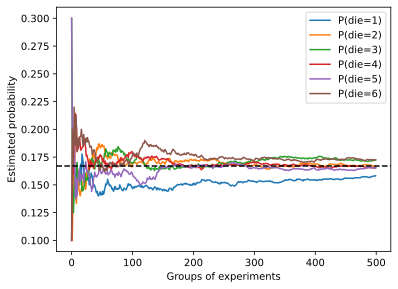

In [16]:
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [17]:
help(multinomial.Multinomial.sample)

Help on function sample in module torch.distributions.multinomial:

sample(self, sample_shape=torch.Size([]))
    Generates a sample_shape shaped sample or sample_shape shaped batch of
    samples if the distribution parameters are batched.



In [18]:
help(torch.ones)

Help on built-in function ones:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the cur

In [19]:
list??